# Squeezing and Homodyne Detection

This example shows a simple example of modelling squeezed light with FINESSE.

## The Optical Configuration

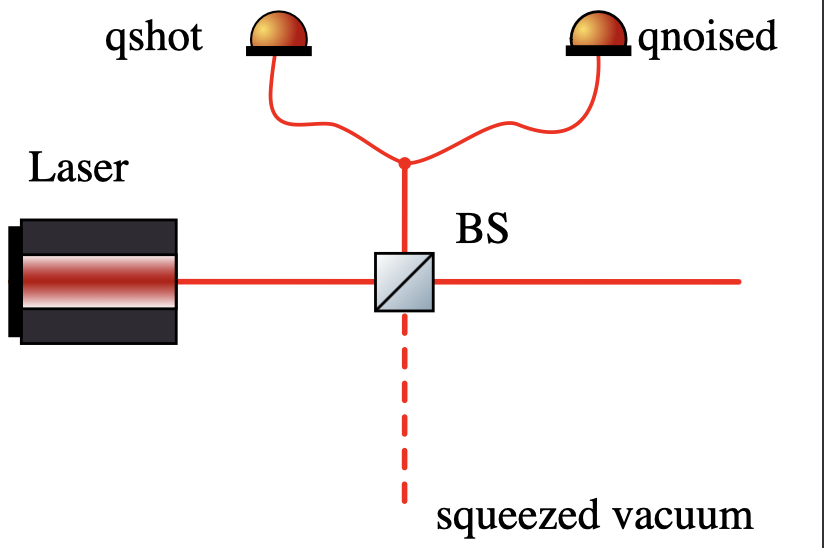

The optical layout shows a laser and a squeezed light source whose beams are superimposed on a beam splitter. Two quantum noise detectors are used for detection, the **qshot** detector measuring only the shot noise (ignoring the squeezing) and the **qnoised** detector measuring the correct quantum noise. We mis a 10 dB squeezed source and a 1 W laser at the beam splitter and measure the result of the photodiode, varying the phase of the laser field.

## The FINESSE Model

In [25]:
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    l l1 P=1
    s s1 l1.p1 bs1.p4 L=1
    sq sq1 db=10
    s s2 sq1.p1 bs1.p1
    bs bs1 R=0.5 L=0 alpha=45

    # Set a signal frequency to activate the signal simulation
    # (needed for squeezing effects to be observed)
    fsig(1)

    # Output the pure shot noise along with the qnoised detector
    # measuring the effects of the squeezing
    qnoised sqzd_noise bs1.p2.o
    qshot shot_noise bs1.p2.o

    xaxis(l1.phase, lin, -90, 90, 360)
    """
)

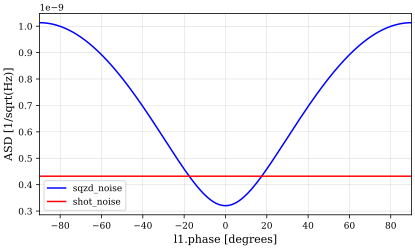

In [26]:
out = kat.run()
out.plot(separate=False);

The plot shows that the **qshot** output is flat, whereas the **qnoised** output rises above and falls below the shot noise depending on the phase. You should also see here that you must be careful to ensure that any squeezed field and laser fields have the correct phase and squeezing angle to give the desired effect (try for example to change the length of **s1** and see what happens).